B. Claimants.csv

In this dataset you have to predict that whether we have to give ATTORNEY to the clients or not (0=Yes, 1=No) based on below factors.
CLMAGE - Age of Client
CLMSEX - Sex of client (0=Male, 1= Female)
SEATBELT - Whether client has Seatbelt or not (0=Yes, 1=No)
CLMINSUR - Whether Client give Insurance or not (0=Yes, 1=No)
LOSS - Loss that client faced

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("claimants.csv")

In [23]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [25]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [26]:
df['CLMSEX'] = df['CLMSEX'].fillna(df['CLMSEX'].mean())

In [27]:
df['CLMINSUR'] = df['CLMINSUR'].fillna(df['CLMINSUR'].mean())

In [28]:
df['SEATBELT'] = df['SEATBELT'].fillna(df['SEATBELT'].mean())

In [29]:
df['CLMAGE'] = df['CLMAGE'].fillna(df['CLMAGE'].mean())

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1340 non-null   float64
 2   CLMINSUR  1340 non-null   float64
 3   SEATBELT  1340 non-null   float64
 4   CLMAGE    1340 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [31]:
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [32]:
df['ATTORNEY'].value_counts()

ATTORNEY
0    685
1    655
Name: count, dtype: int64

<Axes: >

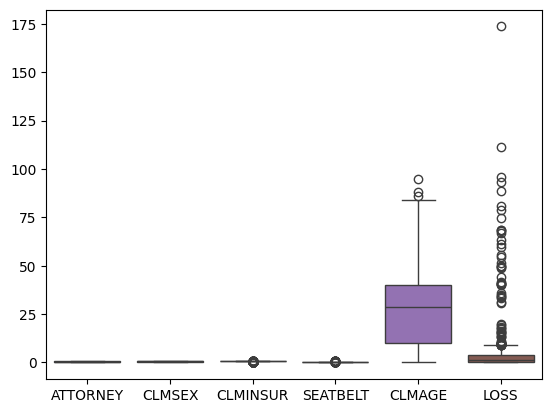

In [33]:
sns.boxplot(df)

In [34]:
df.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.079321,0.078221,-0.056158,0.009886,-0.219715
CLMSEX,0.079321,1.000000,0.065382,-0.014778,-0.021428,-0.027602
CLMINSUR,0.078221,0.065382,1.000000,0.020899,0.046255,0.005810
SEATBELT,-0.056158,-0.014778,0.020899,1.000000,-0.026234,0.111031
CLMAGE,0.009886,-0.021428,0.046255,-0.026234,1.000000,0.057641
LOSS,-0.219715,-0.027602,0.005810,0.111031,0.057641,1.000000


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [36]:
array_scaled = scaler.transform(df)

In [37]:
array_scaled

array([[-0.97785703, -1.13033326,  0.32402726, -0.13403883,  1.14756135,
         2.92804365],
       [ 1.02264438,  0.89268907, -3.1835678 , -0.13403883, -0.55366544,
        -0.27417709],
       [ 1.02264438, -1.13033326,  0.32402726, -0.13403883, -1.24478883,
        -0.32693769],
       ...,
       [ 1.02264438,  0.89268907,  0.32402726, -0.13403883,  0.56276464,
        -0.34866265],
       [-0.97785703,  0.89268907, -3.1835678 , -0.13403883, -1.08529882,
        -0.05918468],
       [ 1.02264438,  0.89268907,  0.32402726, -0.13403883,  0.08429461,
        -0.29326871]])

<Axes: >

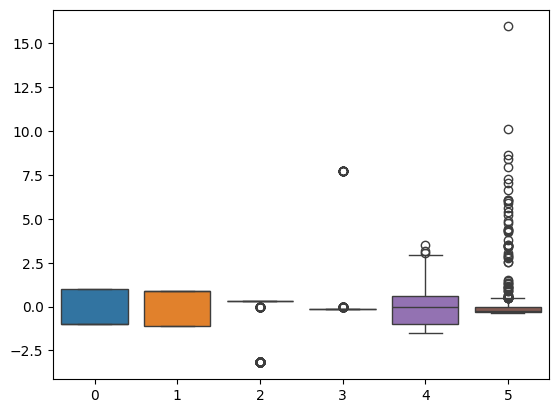

In [38]:
sns.boxplot(array_scaled)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1340 non-null   float64
 2   CLMINSUR  1340 non-null   float64
 3   SEATBELT  1340 non-null   float64
 4   CLMAGE    1340 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [40]:
df_scaled=pd.DataFrame(array_scaled, columns=['ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE', 'LOSS'])

In [41]:
df_scaled

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,-0.977857,-1.130333,0.324027,-0.134039,1.147561,2.928044
1,1.022644,0.892689,-3.183568,-0.134039,-0.553665,-0.274177
2,1.022644,-1.130333,0.324027,-0.134039,-1.244789,-0.326938
3,-0.977857,-1.130333,0.324027,7.737696,0.137458,-0.354494
4,1.022644,-1.130333,0.324027,-0.134039,0.084295,-0.354400
...,...,...,...,...,...,...
1335,1.022644,-1.130333,0.324027,-0.134039,0.000000,-0.303802
1336,-0.977857,0.892689,0.324027,-0.134039,0.934908,-0.009528
1337,1.022644,0.892689,0.324027,-0.134039,0.562765,-0.348663
1338,-0.977857,0.892689,-3.183568,-0.134039,-1.085299,-0.059185


In [42]:
df.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.079321,0.078221,-0.056158,0.009886,-0.219715
CLMSEX,0.079321,1.000000,0.065382,-0.014778,-0.021428,-0.027602
CLMINSUR,0.078221,0.065382,1.000000,0.020899,0.046255,0.005810
SEATBELT,-0.056158,-0.014778,0.020899,1.000000,-0.026234,0.111031
CLMAGE,0.009886,-0.021428,0.046255,-0.026234,1.000000,0.057641
LOSS,-0.219715,-0.027602,0.005810,0.111031,0.057641,1.000000


In [43]:
x=df_scaled.drop('ATTORNEY',axis=1)
y =df_scaled['ATTORNEY']

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)